<a href="https://colab.research.google.com/github/ociragan/AIHub_DL_SummerCamp_Group4_alltogether/blob/main/Urban_Sounds_Classification_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
import librosa
import librosa.display

metadata içerisindeki UrbanSound8K.csv dosyasını inceleme

In [ ]:
soundsdf = pd.read_csv("/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv")

In [ ]:
soundsdf

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
pd.pivot_table(soundsdf, columns="fold", index="classID", values="fsID", aggfunc="count")

fold,1,2,3,4,5,6,7,8,9,10
classID,,,,,,,,,,
0,100,100,100,100,100,100,100,100,100,100
1,36,42,43,59,98,28,28,30,32,33
2,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100
5,96,100,107,107,107,107,106,88,89,93
6,35,35,36,38,40,46,51,30,31,32
7,120,120,120,120,120,68,76,78,82,96
8,86,91,119,166,71,74,77,80,82,83


In [ ]:
x = soundsdf.groupby("fold").count()

In [ ]:
soundsdf.groupby("fold").count()

,slice_file_name,fsID,start,end,salience,classID,class
fold,,,,,,,
1,873,873,873,873,873,873,873
2,888,888,888,888,888,888,888
3,925,925,925,925,925,925,925
4,990,990,990,990,990,990,990
5,936,936,936,936,936,936,936
6,823,823,823,823,823,823,823
7,838,838,838,838,838,838,838
8,806,806,806,806,806,806,806
9,816,816,816,816,816,816,816


In [ ]:
x[x.index==2].iloc[0,0]

888

Her bir klasördeki dosya sayısı

In [ ]:
folder_lengths = []
for i in range (1,11):
  folder_lengths.append(x[x.index==i].iloc[0,0])
print(folder_lengths)

[873, 888, 925, 990, 936, 823, 838, 806, 816, 837]


In [ ]:
foldernumber = str(1)
filename = soundsdf[soundsdf["fold"]==int(foldernumber)].iloc[0,0]
audio_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold" + foldernumber + "/" + filename
audio_path

'/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav'

In [ ]:
filenumber = filename.split(".")[0]
filenumber

'101415-3-0-2'

In [ ]:
foldernumber = str(2)
folderlength = folder_lengths[int(foldernumber)-1]
folderlength

888

Spectrogram resimlerini ayrı ayrı kaydetmek için drive'da spectrogram klasörü altına da fold1, fold2 diye 10 klasör açıldı.

In [ ]:
spectrogram_path = "/content/drive/MyDrive/UrbanSound8K/spectrogram/fold" + foldernumber + "/" + filenumber + ".png"
spectrogram_path

'/content/drive/MyDrive/UrbanSound8K/spectrogram/fold1/101415-3-0-2.png'

# Spectrogram resimlerini oluşturma

In [ ]:
def create_spectrogram(y):
  spec = librosa.feature.melspectrogram(y=y)
  spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
  return spec_conv

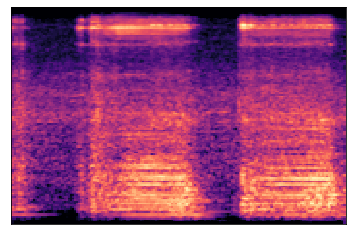

In [ ]:
for j in range (1, 11):
  foldernumber = str(j)
  folderlength = folder_lengths[int(foldernumber)-1]
  for i in range (0, folderlength):
    filename = soundsdf[soundsdf["fold"]==int(foldernumber)].iloc[i, 0]
    filenumber = filename.split(".")[0]
    audio_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold" + foldernumber + "/" + filename
    spectrogram_path = "/content/drive/MyDrive/UrbanSound8K/spectrogram/fold" + foldernumber + "/" + filenumber + ".png"
    testfile = librosa.load(audio_path, res_type='kaiser_fast')
    plt.figure(figsize=(10, 6))
    plt.close()
    spec1 = create_spectrogram(testfile[0])
    librosa.display.specshow(spec1)
    plt.savefig(spectrogram_path)